In [65]:
import os
import pandas as pd
from utils import save_dataframe_as_latex

#database = 'a5a'
#database = 'abalone'
#database = 'CPU_SMALL'
#database = 'Diabetes'
database = 'w3a'

#database = 'eunite2001'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'accuracy per unit time in percent'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(svm_list_names)
print('SvM files')
print(svm_list_names)
svm_data

std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

['Kernel_SVM_w3a_cv_5.csv', 'Random_Fourier_features_and_SVC_w3a_cv_5.csv', 'Kernel_ridge_classification_w3a_cv_5.csv', 'Nystrom_and_ridge_classification_w3a_cv_5.csv', 'Nystrom_and_SVC_w3a_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_w3a_cv_5.csv']
Ridge files
['Kernel_SVM_w3a_cv_5.csv', 'Nystrom_and_SVC_w3a_cv_5.csv', 'Random_Fourier_features_and_SVC_w3a_cv_5.csv']
SvM files
['Kernel_SVM_w3a_cv_5.csv', 'Nystrom_and_SVC_w3a_cv_5.csv', 'Random_Fourier_features_and_SVC_w3a_cv_5.csv']
cv_std_test_score


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,cv_mean_fit_time,cv_std_fit_time,accuracy per unit time in percent,File
0,100,4912,0.970203,0.0,0.203266,0.0,0.970888,0.0,0.970888,0.000489,0.139314,0.002199,477.307386,Kernel_SVM_w3a_cv_5.csv
1,0,1,0.975601,0.0,0.012558,0.0,0.975572,0.0,0.975572,0.006680,0.014570,0.000912,7768.619815,Nystrom_and_SVC_w3a_cv_5.csv
2,0,50,0.980240,0.0,0.028450,0.0,0.975980,0.0,0.975980,0.007458,0.027587,0.002680,3445.480189,Nystrom_and_SVC_w3a_cv_5.csv
3,1,99,0.978991,0.0,0.051618,0.0,0.976183,0.0,0.976183,0.006573,0.039650,0.001478,1896.603286,Nystrom_and_SVC_w3a_cv_5.csv
4,2,148,0.976805,0.0,0.083442,0.0,0.974962,0.0,0.974962,0.007402,0.052502,0.001280,1170.636369,Nystrom_and_SVC_w3a_cv_5.csv
5,2,197,0.981154,0.0,0.106919,0.0,0.974350,0.0,0.974350,0.004471,0.089841,0.006689,917.660563,Nystrom_and_SVC_w3a_cv_5.csv
6,3,246,0.978411,0.0,0.099768,0.0,0.974147,0.0,0.974147,0.007568,0.086286,0.003026,980.686632,Nystrom_and_SVC_w3a_cv_5.csv
7,4,295,0.977050,0.0,0.120724,0.0,0.974554,0.0,0.974554,0.007274,0.111419,0.010517,809.325822,Nystrom_and_SVC_w3a_cv_5.csv
8,4,344,0.978678,0.0,0.151747,0.0,0.975165,0.0,0.975165,0.007994,0.135206,0.007028,644.940855,Nystrom_and_SVC_w3a_cv_5.csv
9,5,393,0.978611,0.0,0.175743,0.0,0.973944,0.0,0.973944,0.007346,0.164451,0.006084,556.842003,Nystrom_and_SVC_w3a_cv_5.csv


In [66]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe

score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


In [67]:
# get tables 
columns = [score_column, time_column, damping_column ]
for column in columns:
    column_name = column.replace(' ', '_').replace('_', '-')
    df = show_dataframe(ridge_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'Ridge-{column_name}-result')
    df = show_dataframe(svm_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'SVM-{column_name}-result')

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/w3a/latex-tables/Ridge-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/w3a/latex-tables/SVM-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/w3a/latex-tables/Ridge-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/w3a/latex-tables/SVM-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/w3a/latex-tables/Ridge-accuracy-per-unit-time-in-percent-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositor

# Sort by score 

In [68]:

show_dataframe(svm_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
42,Random_Fourier_features_and_SVC_w3a_cv_5.csv,13,0.983,983
31,Random_Fourier_features_and_SVC_w3a_cv_5.csv,6,0.983,443
41,Random_Fourier_features_and_SVC_w3a_cv_5.csv,13,0.983,934
40,Random_Fourier_features_and_SVC_w3a_cv_5.csv,12,0.983,885
39,Random_Fourier_features_and_SVC_w3a_cv_5.csv,11,0.983,836
38,Random_Fourier_features_and_SVC_w3a_cv_5.csv,11,0.983,786
36,Random_Fourier_features_and_SVC_w3a_cv_5.csv,9,0.983,688
35,Random_Fourier_features_and_SVC_w3a_cv_5.csv,9,0.983,639
34,Random_Fourier_features_and_SVC_w3a_cv_5.csv,8,0.983,590
28,Random_Fourier_features_and_SVC_w3a_cv_5.csv,4,0.982,295


# Damping

In [69]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,accuracy per unit time in percent,n_components
22,Random_Fourier_features_and_ridge_classificati...,0,8797.594,1
1,Nystrom_and_ridge_classification_w3a_cv_5.csv,0,8522.112,1
23,Random_Fourier_features_and_ridge_classificati...,0,3509.320,50
2,Nystrom_and_ridge_classification_w3a_cv_5.csv,0,3218.074,50
26,Random_Fourier_features_and_ridge_classificati...,2,2692.413,197
25,Random_Fourier_features_and_ridge_classificati...,2,2597.089,148
24,Random_Fourier_features_and_ridge_classificati...,1,2273.239,99
3,Nystrom_and_ridge_classification_w3a_cv_5.csv,1,2200.695,99
27,Random_Fourier_features_and_ridge_classificati...,3,1910.127,246
28,Random_Fourier_features_and_ridge_classificati...,4,1695.732,295


# Plotting 
## Ridge

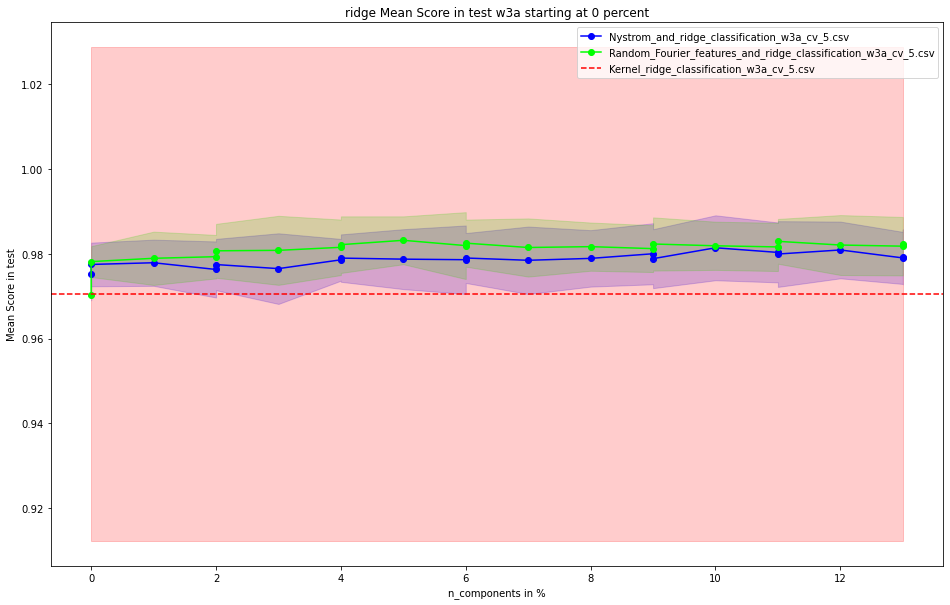

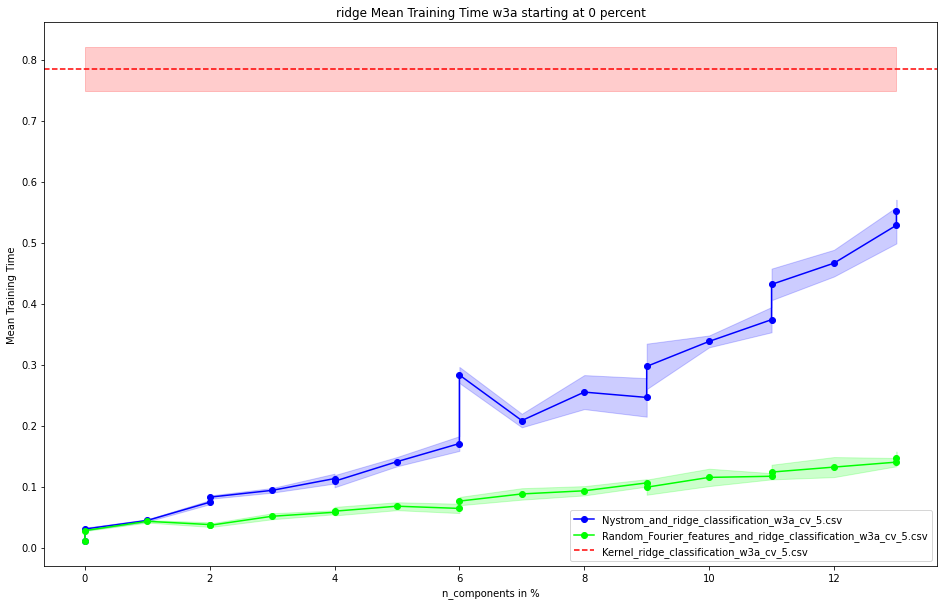

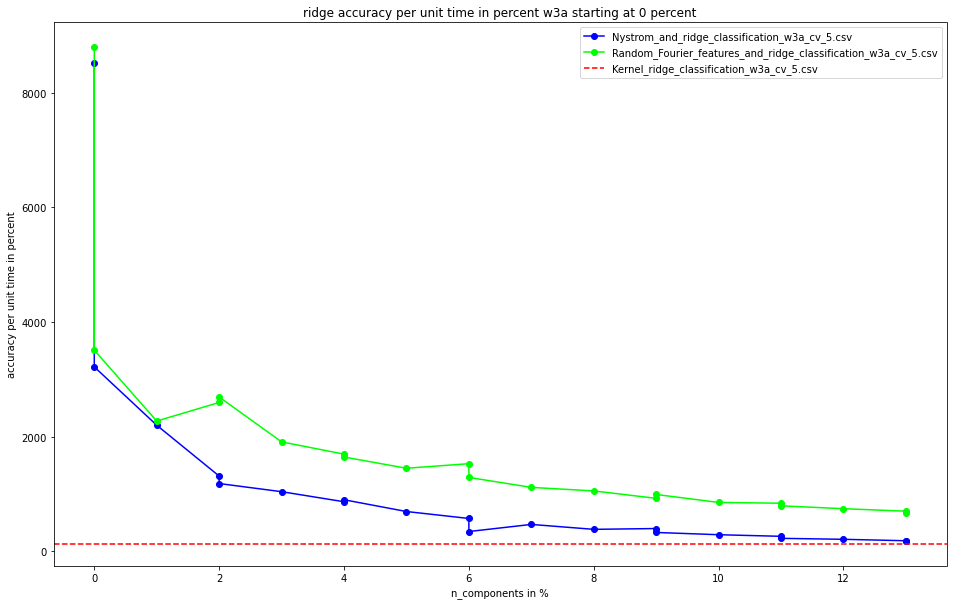

In [70]:
from plotting import view_plots_and_save_them

names_of_std_for_column = {score_column:'Std Score in test', 
    time_column:'Std Training Time',
    damping_column:False
}
if (ridge_list[0][names_of_std_for_column[score_column]] == 0).all():
    names_of_std_for_column = {score_column:'cv_std_test_score', 
        time_column:'cv_std_fit_time',
        damping_column:False
    }
    
columns = [score_column, time_column, damping_column ]

view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0, marker='o')


## SVM 

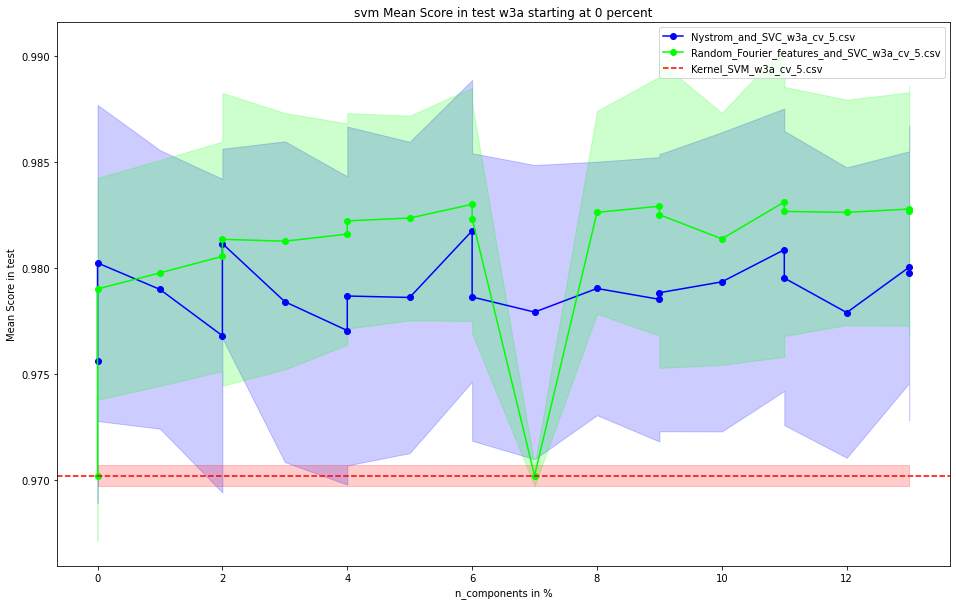

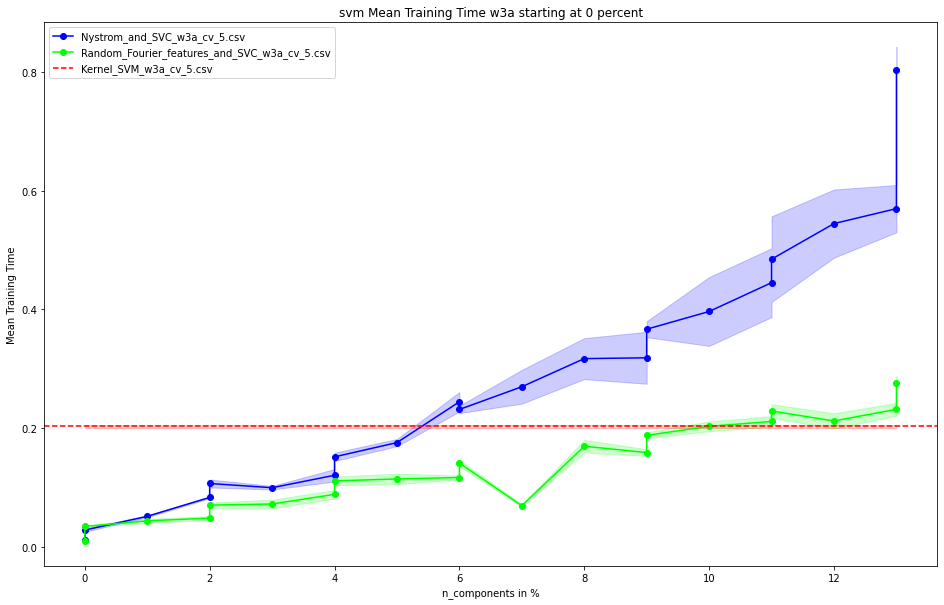

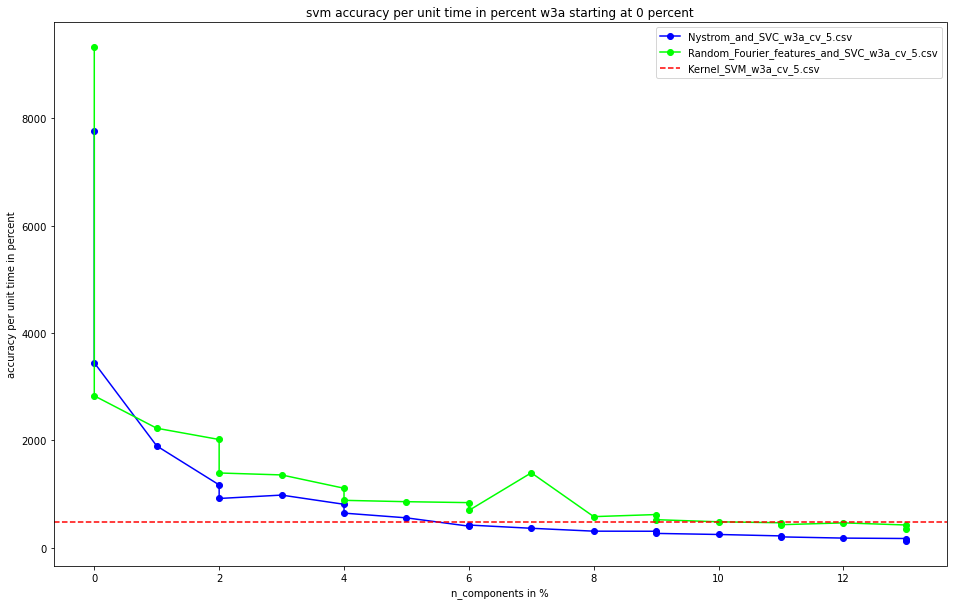

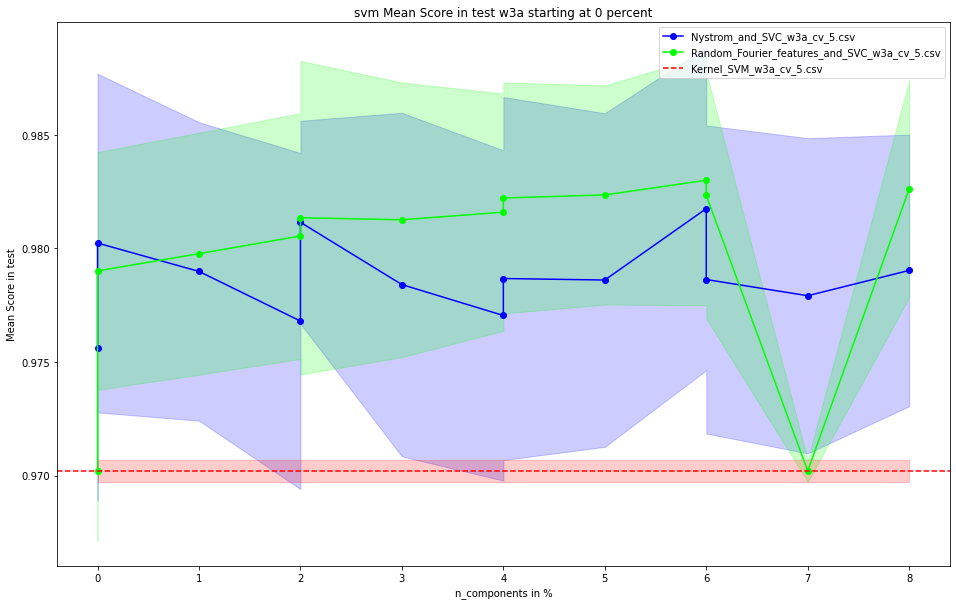

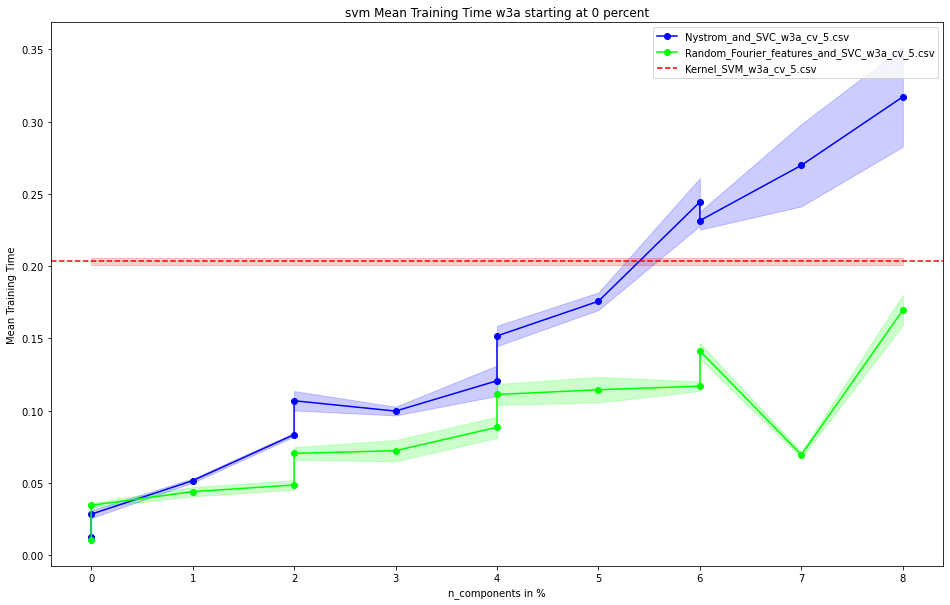

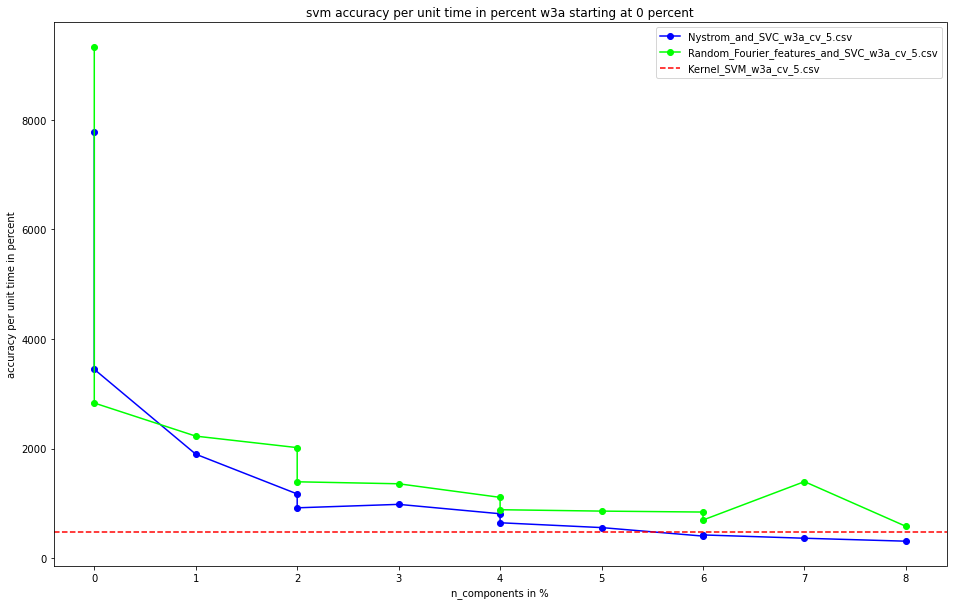

In [71]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0, marker='o')
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            percent_of_n_components_smaller_than=8, marker='o')

# Hyperparameter

In [72]:
def unique_values(df):
    pd.set_option('display.max_colwidth', None)
    return df.groupby(['Best Parameters', 'File']).size().reset_index(name='Frequency')

df = unique_values(svm_data_verbose)
save_dataframe_as_latex(df, tables_path, 'svm-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/w3a/latex-tables/svm-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,"{'fourier_random_features__gamma': 0.0001578871423448331, 'svm__C': 0.001584893192461114}",Random_Fourier_features_and_SVC_w3a_cv_5.csv,1
1,"{'fourier_random_features__gamma': 0.0001578871423448331, 'svm__C': 0.3981071705534969}",Random_Fourier_features_and_SVC_w3a_cv_5.csv,17
2,"{'fourier_random_features__gamma': 0.0010995899256440774, 'svm__C': 0.3981071705534969}",Random_Fourier_features_and_SVC_w3a_cv_5.csv,1
3,"{'fourier_random_features__gamma': 3.2552083333333335e-06, 'svm__C': 0.0001}",Random_Fourier_features_and_SVC_w3a_cv_5.csv,1
4,"{'fourier_random_features__gamma': 3.2552083333333335e-06, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_w3a_cv_5.csv,1
5,"{'kernel_svm__C': 0.01, 'kernel_svm__gamma': 3.2552083333333335e-06}",Kernel_SVM_w3a_cv_5.csv,1
6,"{'nystroem__gamma': 0.0004166666666666667, 'svm__C': 0.1}",Nystrom_and_SVC_w3a_cv_5.csv,16
7,"{'nystroem__gamma': 0.0004166666666666667, 'svm__C': 100.0}",Nystrom_and_SVC_w3a_cv_5.csv,1
8,"{'nystroem__gamma': 0.0004166666666666667, 'svm__C': 3.1622776601683795}",Nystrom_and_SVC_w3a_cv_5.csv,3
9,"{'nystroem__gamma': 3.6828478186799355e-05, 'svm__C': 100.0}",Nystrom_and_SVC_w3a_cv_5.csv,1


In [73]:
df = unique_values(ridge_data_verbose)
save_dataframe_as_latex(df, tables_path, 'ridge-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/w3a/latex-tables/ridge-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,"{'fourier_random_features__gamma': 0.0004166666666666667, 'ridge_classification__alpha': 3.1622776601683795}",Random_Fourier_features_and_ridge_classification_w3a_cv_5.csv,18
1,"{'fourier_random_features__gamma': 3.2552083333333335e-06, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_w3a_cv_5.csv,1
2,"{'fourier_random_features__gamma': 3.6828478186799355e-05, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_w3a_cv_5.csv,1
3,"{'fourier_random_features__gamma': 3.6828478186799355e-05, 'ridge_classification__alpha': 0.1}",Random_Fourier_features_and_ridge_classification_w3a_cv_5.csv,1
4,"{'kernel_ridge_classification__alpha': 0.3981071705534969, 'kernel_ridge_classification__gamma': 3.2552083333333335e-06}",Kernel_ridge_classification_w3a_cv_5.csv,1
5,"{'nystroem__gamma': 0.0004166666666666667, 'ridge_classification__alpha': 0.0001}",Nystrom_and_ridge_classification_w3a_cv_5.csv,4
6,"{'nystroem__gamma': 0.0004166666666666667, 'ridge_classification__alpha': 0.0031622776601683794}",Nystrom_and_ridge_classification_w3a_cv_5.csv,1
7,"{'nystroem__gamma': 0.0004166666666666667, 'ridge_classification__alpha': 0.1}",Nystrom_and_ridge_classification_w3a_cv_5.csv,2
8,"{'nystroem__gamma': 0.0004166666666666667, 'ridge_classification__alpha': 3.1622776601683795}",Nystrom_and_ridge_classification_w3a_cv_5.csv,14
